# Loan Prediction ML Project
Weekly challenge: Week 08  
Date: 9/12/2022

**Objective:** Solve binary classification problem using Python

**Steps that I will follow:**  
1. Problem statement  
2. Hypothesis generation  
3. Getting the system ready and loading the data  
4. Understanding the data  
5. Exploratory Data Analysis (EDA)  
  * Univariate analysis
  * Bivariate analysis
6. Missing value and outlier treatment
7. Evaluation Metrics for classification problems
8. Model building: Part I
9. Logistic Regression using stratified k-folds cross validation
10. Feature Engineering  
11. Model building: Part II  
  * Logistic Regression  
  * Decision Tree  
  * Random Forest  
  * XGBoost

## 1. Problem statement  
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are **Gender, Marital Status, Education, # of Dependents, Income, Loan Amount, Credit History** and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variables.  

Classification can be of two types:  
* Binary classification: Here we have to predict either of the two given classes. e.g. classifying the gender as male or female, predictiing the result as win or loss...
* Multiclass classification: Here we have to classify the data into three or more classes. e.g. classifying a movies's genre as comedy, action or romantic, classify fruits as oranges, apples or pears...

## 2. Hypothesis generation
It is a process of listing out all the possible factors that can affect the outcome. Below are some of the factors that can affect the loan approval (independent variables for the loan prediction problem).  

* 1. Salary: Applicant with high income should have more chances of loan approval.
* 2. Previous history: Applicants who have repayed their previous debts should have higher chance of loan approval.  
* 3. Loan amount: If the loan amount is less, chances of loan approval should be high.  
* 4. Loan term: Loan for lesser duration should have a higher chance of loan approval.  
* 5. Monthly installment: Chances of loan approval should be higher if the amount to be paid monthly is lower.  

I have listed above some factors that I think might affect the target variable.

## 3. Getting the system ready and loading the data

### Loading the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data

For this project, there are 2 files: train.csv, test.csv.
* train.csv file will be used for training the model; the model will learn from this file. It contains all the independent variables as well as the target variable.
* test.csv file contains all the independent variables, it does not contain the target variable. We will apply the model to predict the target variable for the test data.

### Reading the data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Making copies of train & test data so we can make changes to the datasets, if needed.
train_original = train.copy()
test_original = test.copy()

## 4. Understanding the data
Here, we will look at the structure of train & test datasets. First, we will check the features present in the data and then will check their data types.

In [4]:
# Checking columns of the test data
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

There are 12 independent variables and 1 target variable in the train dataset.

In [5]:
# Checking columns of the test data
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

There are 12 independent variables in the train dataset. 'Loan_Status' is missing which is our target variable. We will predict the 'Loan_Status' using our model that we will build using the train sataset.

**Description of each variable**  
* Loan_ID: Unique loan ID  
* Gender: Male / Female  
* Married: Applicant married (Yes / No)  
* Dependents: # of dependents  
* Education: Applicant's education (Graduate, Not graduate)   
* Self_Employed: Applisant self employed? (Yes / No)  
* ApplicantIncome: Income of the applicant  
* CoapplicantIncome: Income of the co-applicant  
* LoanAmount: Loan amount in thousands  
* Loan_Amount_Term: Term / duration of loan in months  
* Credit_History: Credit history meets guidelines (1 - Yes / 0 - No)  
* Property_Area: Urban / Semi urban / Rural  
* Loan_Status: Loan approved (Yes / No)

**Data type of each variable in the train dataset**

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are three formats of data types.  
* Object: It represents variables that are text or categorical.  
  -- *There are 8 variables: Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'*  
  -- Here, 'Loan_ID' is text variable and the remaining 7 are categorical variables. I will convert these 7 variables to categorical variables.  
  -- 'Loan_ID' won't be of much use in my analysis so I won't be using it.
* int64: It represents variables that are integer.  
  -- *There is 1 variable: 'ApplicantIncome'*  
* float64: It represents variables with decimal values.  
  -- *There are 4 variables: 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'*  
  -- Here, 'Credit_History' is float64 but it is a categorical variable with either credit history meets guidelines as 1 (Yes) or credit history does not meets guidelines as 0 (No). Due to this fact, we can convert it to the categorical variable.

**Converting the data types**

In [7]:
train_types = {'Gender':'category', 'Married':'category', 'Dependents':'category',
               'Education':'category', 'Self_Employed':'category', 'Credit_History':'category',
               'Property_Area':'category', 'Loan_Status':'category'}
train = train.astype(train_types)
train.dtypes

Loan_ID                object
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area        category
Loan_Status          category
dtype: object

In [8]:
test_types = {'Gender':'category', 'Married':'category', 'Dependents':'category',
               'Education':'category', 'Self_Employed':'category', 'Credit_History':'category',
               'Property_Area':'category'}
test = test.astype(test_types)
test.dtypes

Loan_ID                object
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome       int64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area        category
dtype: object

**Shape of each dataset**

In [9]:
train.shape

(614, 13)

In [10]:
test.shape

(367, 12)

-- There are 614 rows and 13 columns in the train dataset.  
-- There are 367 rows and 12 columns in the test dataset.

In [11]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


## 5. Exploratory Data Analysis (EDA)

###   Univariate analysis
* It is the simplest form of analyzing data where we examine each variable individually.  
* For categorical features, we can use frequency table or bar plot which will calculate the number of values / rows in each category in a particular variable.  
* For numerical features, we can use probability density plots to look at the distribution of the variables.

**Target variable**  
We will first looks at the 'Loan_Status', our Taregt variable. It is a categorical variable so we will look at its frequency table, % distribution and bar plot.

In [12]:
# Frequency table: It will give us the count of each category in that variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
# % distribution: To better undetsrand the frequency table, we can set normalize to True which 
# would give us proportion of each category.
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

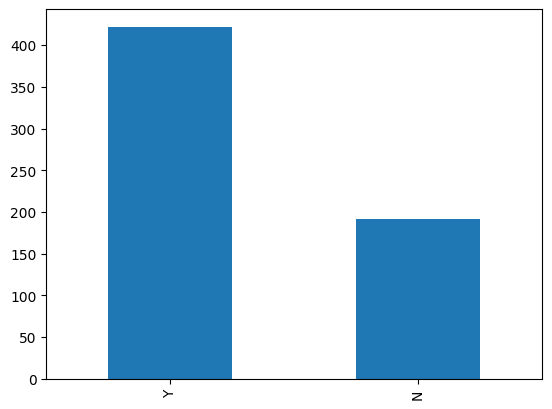

In [14]:
# Bar plot: We can visualize the frequency table using a bar plot.
train['Loan_Status'].value_counts().plot.bar()
plt.show()

From the above analysis, we can see that:
* The loan of 422 (68.7%) people out of 614 was approved.
* The loan of 192 (31.2%) people out of 614 was not approved.

We will now visualize each variable separately. In our dataset we have categorical, ordinal and numerical features. 
* **Categorical:** These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status).  
* **Ordinal:** These categorical features have some order involved (Dependents, Education, Property_Area).  
* **Numerical:** These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term).

**Visualizing independent variables (4 categorical variables)**

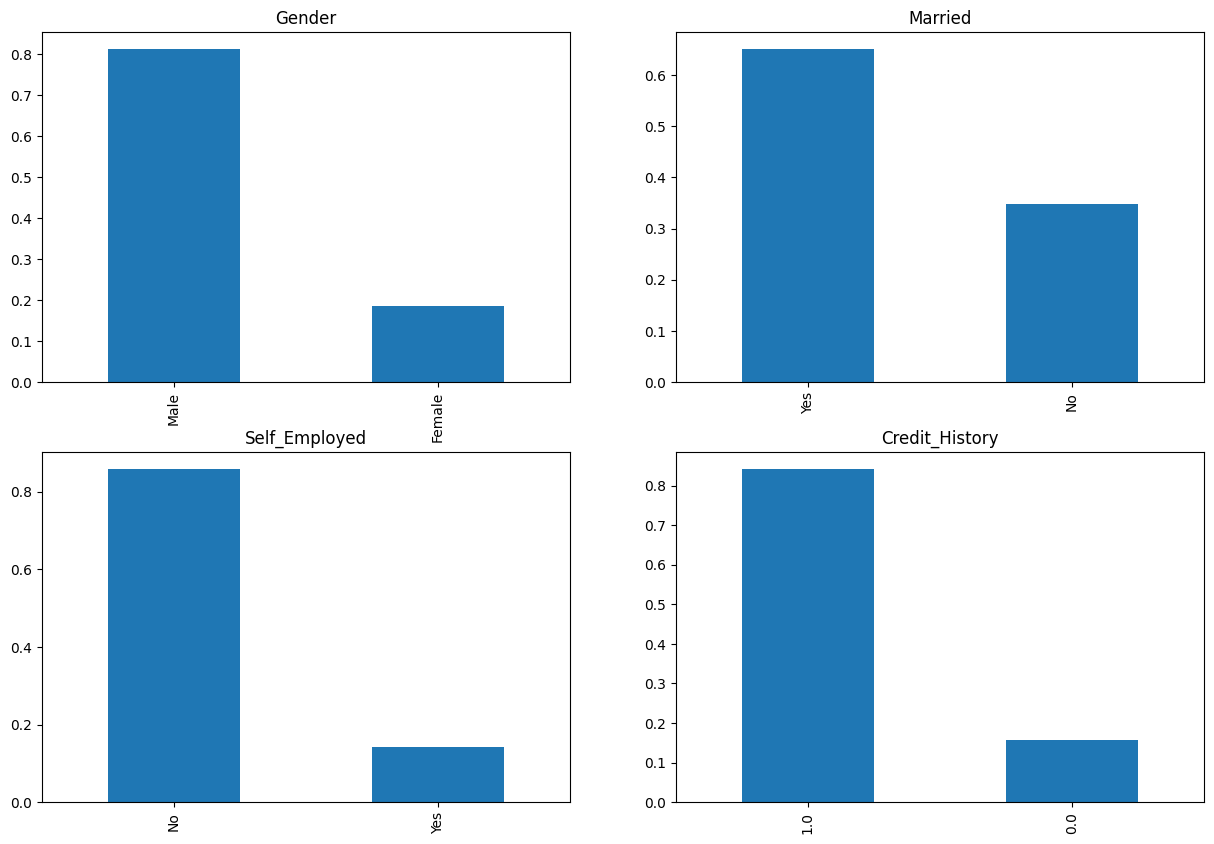

In [15]:
plt.figure(1)

plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (15, 10), title = 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit_History')

plt.show()

We can infer the following from the above bar plots.  
* About 80% of applicants are male.  
* About 65% of applicants are married.  
* About 15% of applicants are self-employed.  
* About 85% of applicants have repaid their loan debts.

**Visualizing independent variables (3 ordinal variables)**

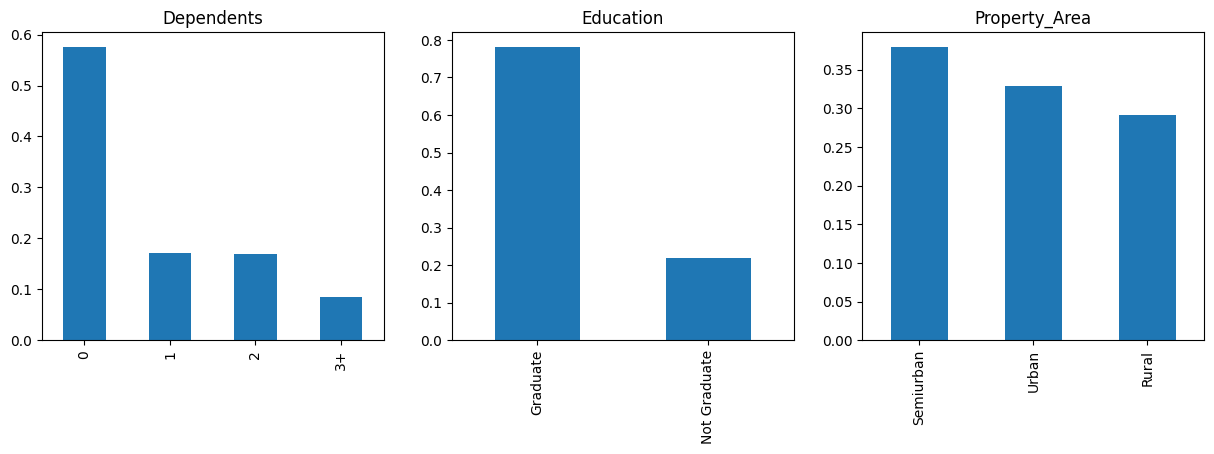

In [16]:
plt.figure(1)

plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (15, 4), title = 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')

plt.show()

We can infer the following from the above bar plots.  
* About 57% of applicants do not have any dependents.  
* About 78% of applicants are graduates.  
* About 38% of applicants from semiurban areas and about 30% each from urban and rural areas.  

**Visualizing independent variables (4 numerical variables)**  
ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

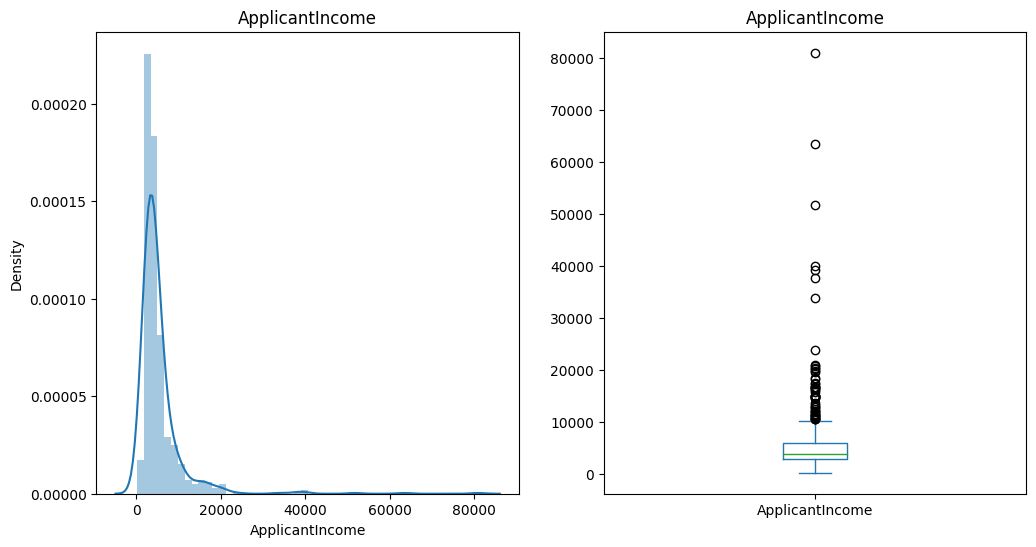

In [17]:
# Distribution of ApplicantIncome
plt.figure(1)

plt.subplot(121)
sns.distplot(train['ApplicantIncome']).set(title = 'ApplicantIncome');


plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (12,6), title = 'ApplicantIncome')

plt.show()

-- We can infer from the above distribution plot that the distribution of ApplicantIncome is right skewed and not normally distributed.  
-- ML algorithms work better with normally distributed data so we will try to make ApplicantIncome normally distributed before using them for ML algorithms.  
-- The box plot shows us that the data has many outliers because of which the distribution plot is right skewed. This can be attributed to the income disparity in the society. We are also looking at people with different educational levels and separating their educational levels would give us a better idea.

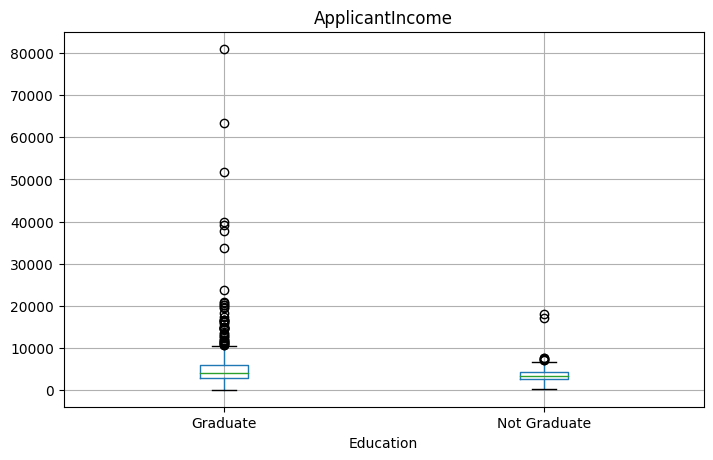

In [18]:
# Separating educational levels
train.boxplot(column = 'ApplicantIncome', by = 'Education', figsize = (8,5))
plt.suptitle("")
plt.show()

We can infer from the above plot that there are higher # of graduates with very high income which appear to be outliers.

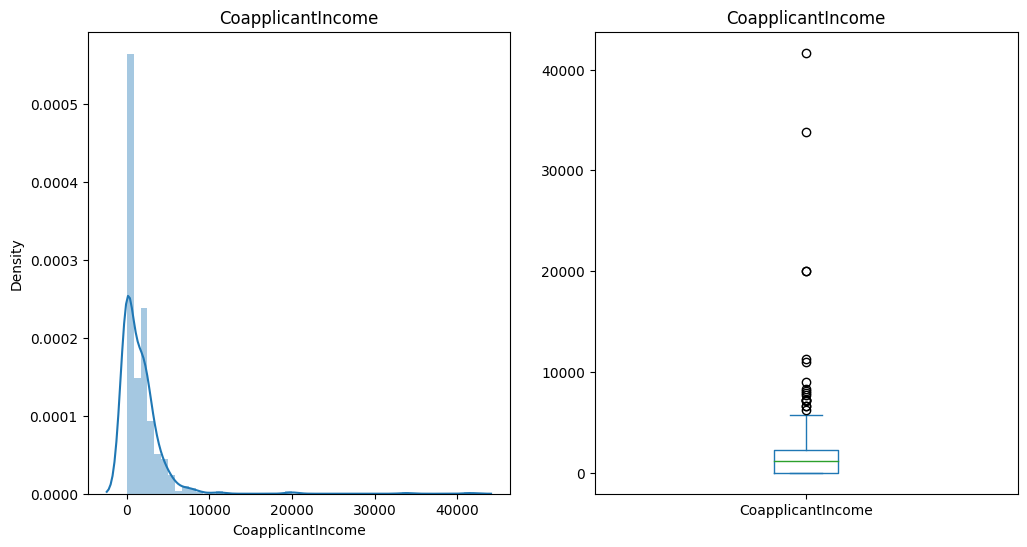

In [19]:
# Distribution of CoapplicantIncome
plt.figure(1)

plt.subplot(121)
sns.distplot(train['CoapplicantIncome']).set(title = 'CoapplicantIncome');

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize = (12,6), title = 'CoapplicantIncome')

plt.show()

-- We can see that distribution of CoapplicantIncome is very similar to that of ApplicantIncome.  
-- Majority of CoapplicantIncome ranges from 0 to 5000.  
-- There are outliers as well.  
-- CoapplicantIncome is also right skewed and not normally distributed.

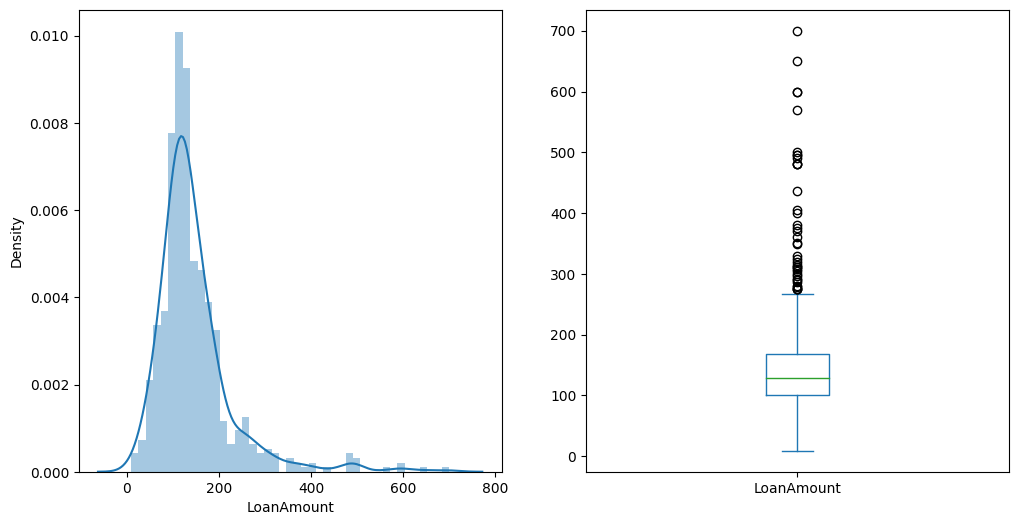

In [20]:
# Distribution of LoanAmount
plt.figure(1)

plt.subplot(121)
sns.distplot(train['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize = (12,6))

plt.show()

There are a lot of outliers in LoanAmount variable as well. The distribution is right skewed but fairly normal.

*We would like to know now how well each feature correlates with Loan_Status and this can be done thru bivariate analysis.*

### Bivariate analysis

We generated the following hypothesis earlier.
* 1. Salary: Applicant with high income should have more chances of loan approval.
* 2. Previous history: Applicants who have repayed their previous debts should have higher chance of loan approval.  
* 3. Loan amount: If the loan amount is less, chances of loan approval should be high.  
* 4. Loan term: Loan for lesser duration should have a higher chance of loan approval.  
* 5. Monthly installment: Chances of loan approval should be higher if the amount to be paid monthly is lower.   

-- We will test these hypothesis using bivariate analysis.  
-- We have looked them individually in univariate analysisand and will now explore then with respect to the target variable.

#### Categorical independent variable VS Target variable
* Here, we will find the relationship between Categorical independent variable & Target variable.  
* We will look at the stacked bar plot which will give us the proprtion of approved and unapproved loans.

***Gender VS Loan_Status***

In [21]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])

In [22]:
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [23]:
temp = Gender.div(Gender.sum(1).astype(float), axis = 0)
temp

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


In [24]:
Gender.sum(1) # '1' is for column; so 37 + 75 = 112 for Female
# .div(Gender.sum(1)): Divide each column element for Female by Gender.sum(1) which is 112
# So 37 / 112 = 0.330357

Gender
Female    112
Male      489
dtype: int64

<AxesSubplot: xlabel='Gender'>

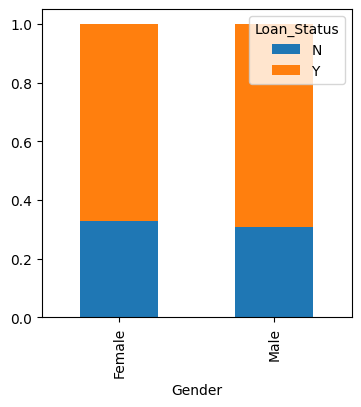

In [25]:
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

-- We can infer from the above plot that the proportion of loan approval and unapproval for male and female is almost the same.

***Married VS Loan_Status***

<AxesSubplot: xlabel='Married'>

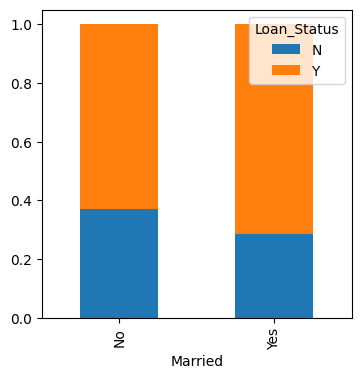

In [26]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

-- We can infer from the above plot that the proportion of loan approval for married applicant is little higher compared to the unmarried applicants.

***Dependents VS Loan_Status***

<AxesSubplot: xlabel='Dependents'>

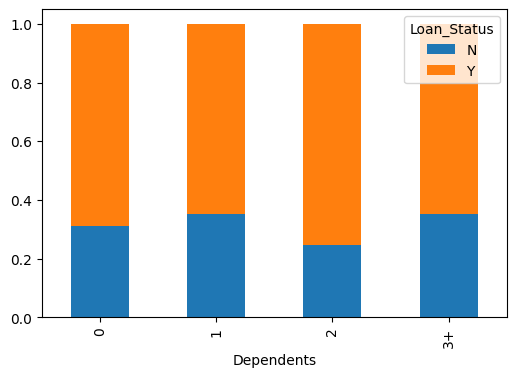

In [27]:
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (6,4))

-- We can infer from the above plot that the proportion of loan approval for 1 or 3+ dependents is almost the same and a little lower compared to 0 or 2 dependents.  
-- Loan approval is highest for applicants with 2 dependents.

***Education VS Loan_Status***

<AxesSubplot: xlabel='Education'>

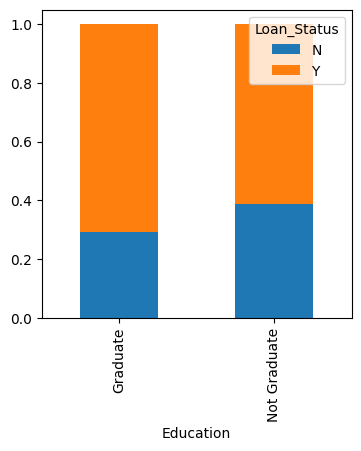

In [28]:
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

***Self_Employed VS Loan_Status***

<AxesSubplot: xlabel='Self_Employed'>

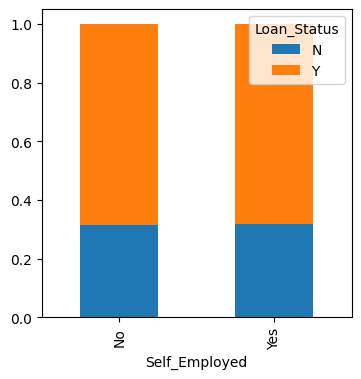

In [29]:
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

-- We can not infer much from the above plot.  
-- Loan approval doesn't make any difference whether the applicant is Self_Employed or not.

***Credit_History VS Loan_Status***

<AxesSubplot: xlabel='Credit_History'>

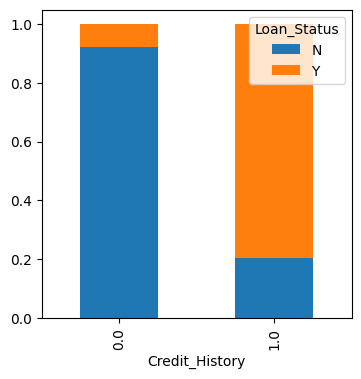

In [30]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

-- Applicants with 0 Credit_History (no history, bad credit,...) have very slim chances of getting their loan approved.  
-- Applicants with 1 Credit_History (good credit,...) have considerably higher chances of getting their loan approved. This is in line with our hypothesis #2 in which we stated that the applicants who have repayed their previous debts should have higher chance of loan approval.

***Property_Area VS Loan_Status***

<AxesSubplot: xlabel='Property_Area'>

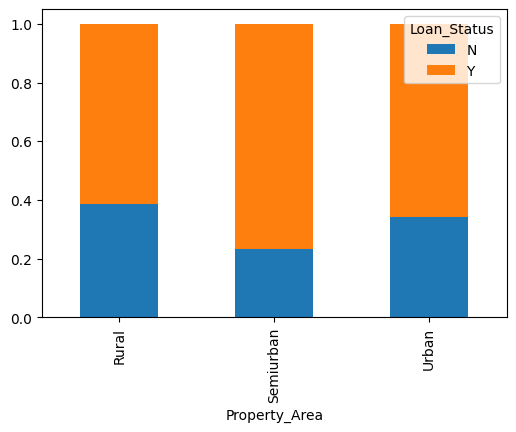

In [31]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (6,4))

-- Applicants from Semiurban areas have a little higher chances of getting their loans approved compared to the applicants from Rural as well as Urban areas.

#### Numerical independent variable VS Target variable
* Here, we will find the relationship between Numerical independent variable & Target variable.
* Here too, we will look at the stacked bar plot which will give us the proprtion of approved and unapproved loans.

**Analysis of Applicant Income**

***ApplicantIncome:*** We will try to find the mean income of people for which the has been approved and the mean income of people for which the has not been approved.

In [32]:
train.groupby(by='Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

Text(0.5, 1.0, 'Loan_Status V/S Mean income')

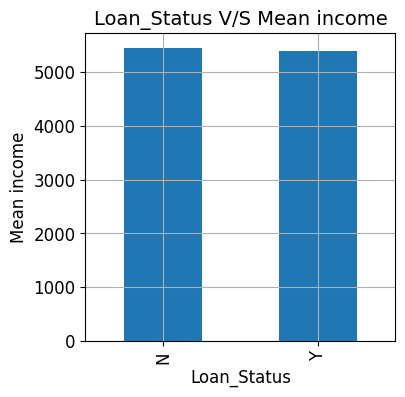

In [33]:
train.groupby(by='Loan_Status')['ApplicantIncome'].mean().plot(
    kind='bar', grid=True, legend=False,
    rot=90, fontsize=12, figsize=(4,4))
plt.ylabel('Mean income', fontsize=12)
plt.xlabel('Loan_Status', fontsize=12)
plt.title('Loan_Status V/S Mean income', fontsize=14)

-- There is not much change in the mean income of the applicants whose loan is approved or not.  
-- To better understand, we will make bins for the applicant income variable and analyze the loan status for each bin.

[Text(0.5, 1.0, 'ApplicantIncome')]

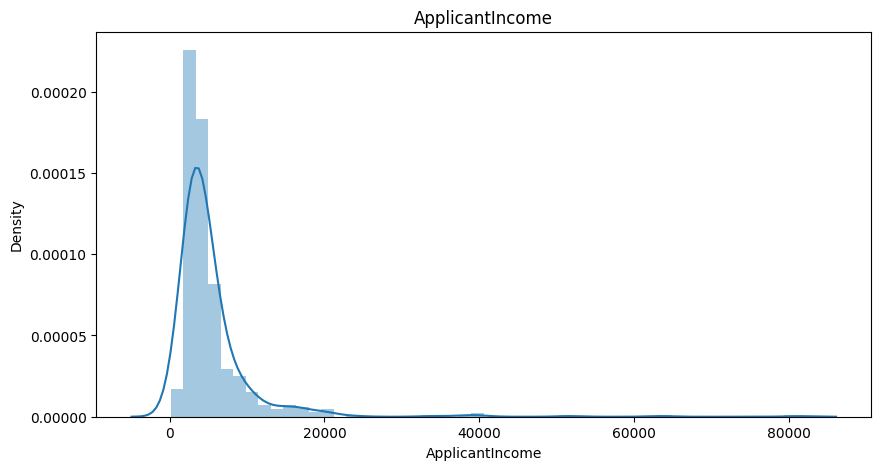

In [34]:
# Checking on the ApplicantIncome plot before binning
plt.figure(figsize=(10,5))
sns.distplot(train['ApplicantIncome']).set(title = 'ApplicantIncome')

Text(0.5, 1.0, 'ApplicantIncome V/S Percentage')

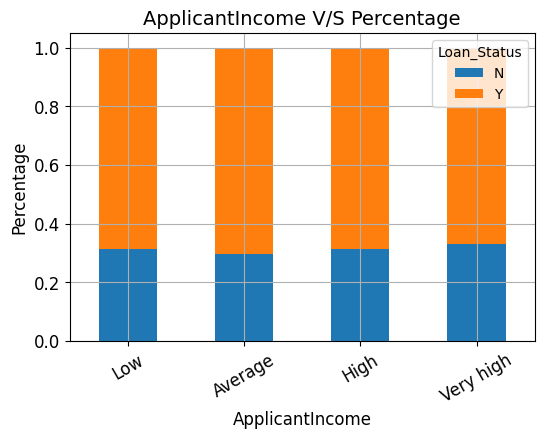

In [35]:
# Plotting the chart according to the bins
bins_ = [0,2500,4000,6000,80000]
group = ['Low','Average','High','Very high']

train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins=bins_, labels=group)
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])

Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(
    kind='bar', stacked=True, figsize=(6,4), grid=True, legend=True, rot=30, fontsize=12)

plt.ylabel('Percentage', fontsize=12)
plt.xlabel('ApplicantIncome', fontsize=12)
plt.title('ApplicantIncome V/S Percentage', fontsize=14)

-- From the above plot, we can infer that the ApplicantIncome does not affect the chance of loan approval. We can see that the loan approve rate is almost the same for each group of income.  
-- This contradicts our hypothesis #1 in which we stated that the applicant with high income should have more chances of loan approval.

In [36]:
# Just to review crosstab() functionality
pd.crosstab(train['Income_bin'], train['Loan_Status'])

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very high,45,91


**Analysis of Coapplicant Income**

***CoapplicantIncome:*** We will analyze coapplicant income in a similar way. 

Text(0.5, 1.0, 'coapplicantIncome V/S Percentage')

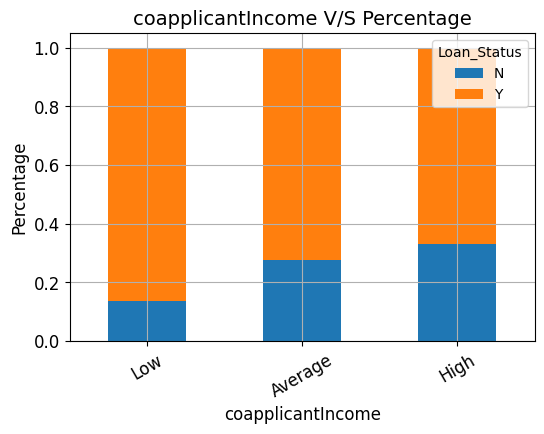

In [37]:
# Plotting the chart according to the bins
bins_ = [0,1000,3000,42000]
group = ['Low','Average','High']

train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins=bins_, labels=group)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])

Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(
    kind='bar', stacked=True, figsize=(6,4), grid=True, legend=True, rot=30, fontsize=12)

plt.ylabel('Percentage', fontsize=12)
plt.xlabel('coapplicantIncome', fontsize=12)
plt.title('coapplicantIncome V/S Percentage', fontsize=14)

In [38]:
len(train[train['CoapplicantIncome'] == 0])

273

* The above plot shows that if a coapplicant's income is low, the chances of loan approval is high. But this doesn't look logical! The reason for this could be that out of 614 applicants, 273 applicants do not have any coapplicant. So coapplicant income for such applicants is 0 and loan approval is not dependent on it.  
* To better understand this, we will combine applicant & coapplicant's income and analyze it.

Text(0.5, 1.0, 'Total_Income V/S Percentage')

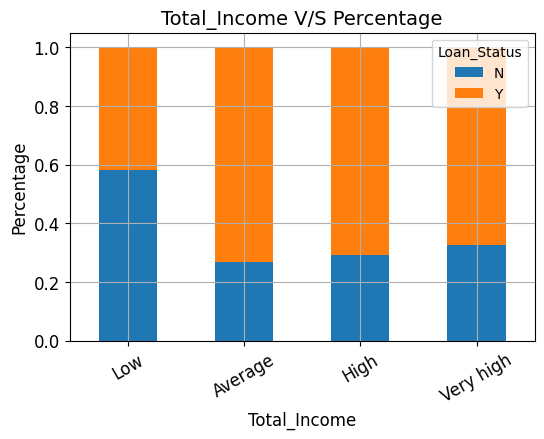

In [39]:
# Combining applicant & coapplicant's income
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

bins_ = [0,2500,4000,6000,80000]
group = ['Low','Average','High','Very high']

train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins=bins_, labels=group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])

Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(
    kind='bar', stacked=True, figsize=(6,4), grid=True, legend=True, rot=30, fontsize=12)

plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Total_Income', fontsize=12)
plt.title('Total_Income V/S Percentage', fontsize=14)

We can see that loan approval rate for the applicants with low Total_Income is very less compared to the other categories.

**Analysis of Loan Amount**

Text(0.5, 1.0, 'LoanAmount V/S Percentage')

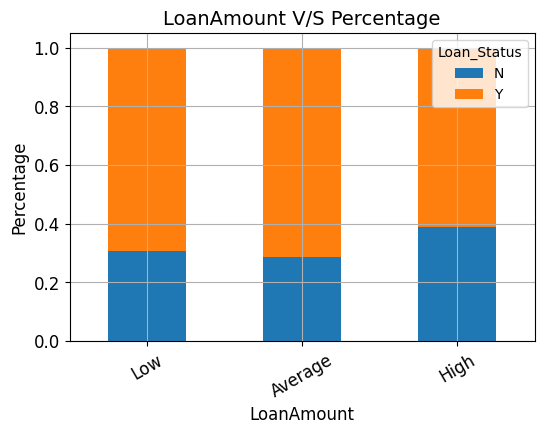

In [40]:
# Analyzing loan amount
bins_ = [0,100,200,700]
group = ['Low','Average','High']

train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins=bins_, labels=group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])

LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(
    kind='bar', stacked=True, figsize=(6,4), grid=True, legend=True, rot=30, fontsize=12)

plt.ylabel('Percentage', fontsize=12)
plt.xlabel('LoanAmount', fontsize=12)
plt.title('LoanAmount V/S Percentage', fontsize=14)

* We can see that the applicants with low and average loan amount have slightly higher chance of getting their loan approved compared to the applicant with higher loan amount.
* This supports our hypothesis #3 in which we mentioned that if the loan amount is less, chances of loan approval should be high.

[Text(0.5, 1.0, 'Loan_Amount_Term')]

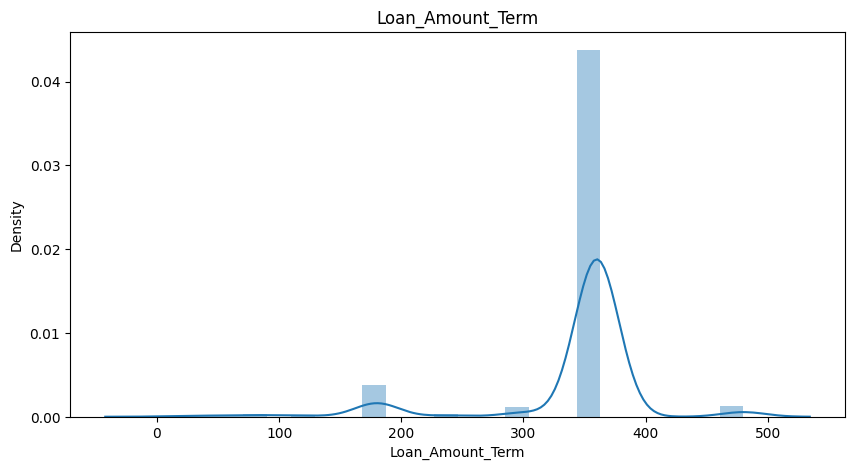

In [41]:
# Checking on the Loan_Amount_Term plot before binning
plt.figure(figsize=(10,5))
sns.distplot(train['Loan_Amount_Term']).set(title = 'Loan_Amount_Term')

Text(0.5, 1.0, 'Loan_Amount_Term V/S Percentage')

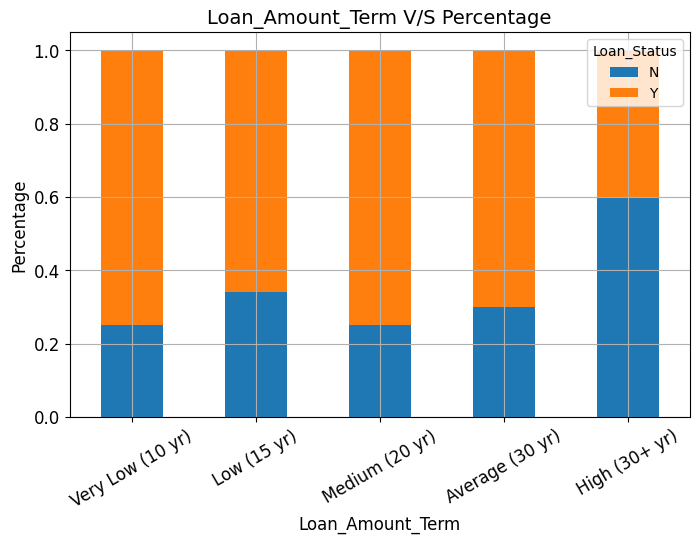

In [42]:
# Analyzing Loan_Amount_Term
bins_ = [0,120,180,240,360,600]
group = ['Very Low (10 yr)','Low (15 yr)','Medium (20 yr)','Average (30 yr)','High (30+ yr)']

train['Loan_Amount_Term_bin'] = pd.cut(train['Loan_Amount_Term'], bins=bins_, labels=group)
Loan_Amount_Term_bin = pd.crosstab(train['Loan_Amount_Term_bin'], train['Loan_Status'])

Loan_Amount_Term_bin.div(Loan_Amount_Term_bin.sum(1).astype(float), axis=0).plot(
    kind='bar', stacked=True, figsize=(8,5), grid=True, legend=True, rot=30, fontsize=12)

plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Loan_Amount_Term', fontsize=12)
plt.title('Loan_Amount_Term V/S Percentage', fontsize=14)

* We can see that applicants with very low term loan have higher chance of loan approval and with higher term loan have lower chance of loan approval.
* This is in line with our hypothesis #4 stating that the loan for lesser duration should have a higher chance of loan approval.

**We will do the following changes to find correlation between the numerical variable & Target variable**

*Dropping all the bins and Total_Income columns that we created earlier.*

In [43]:
train = train.drop(['Income_bin','Coapplicant_Income_bin','Total_Income','Total_Income_bin',
                    'LoanAmount_bin','Loan_Amount_Term_bin'], axis=1)

*Changing the Dependents variable into numerical variable; changing 3+ to 3*

In [44]:
train['Dependents'].unique()

['0', '1', '2', '3+', NaN]
Categories (4, object): ['0', '1', '2', '3+']

In [45]:
# Changing the Dependents column to numerical from object
train['Dependents'].replace('0', 0, inplace=True)
train['Dependents'].replace('1', 1, inplace=True)
train['Dependents'].replace('2', 2, inplace=True)
train['Dependents'].replace('3+', 3, inplace=True)

In [46]:
train['Dependents'].unique()

[0, 1, 2, 3, NaN]
Categories (4, int64): [0, 1, 2, 3]

In [47]:
test['Dependents'].unique()

['0', '1', '2', '3+', NaN]
Categories (4, object): ['0', '1', '2', '3+']

In [48]:
# Changing the Dependents column to numerical from object
test['Dependents'].replace('0', 0, inplace=True)
test['Dependents'].replace('1', 1, inplace=True)
test['Dependents'].replace('2', 2, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

*Converting the target variable's categories into 0 & 1 to find correllation between the target and Dependents variables*  
-- One more reason for this conversion is, some models like logistic regression takes only numeric values as input.  
-- We will replace N with 0 and Y with 1.

In [49]:
train['Loan_Status'].replace('N', 0, inplace = True)
train['Loan_Status'].replace('Y', 1, inplace = True)

*Converting Credit_History and Loan_Status to numeric in both datasets*

In [50]:
train['Credit_History'] = pd.to_numeric(train['Credit_History'])
train['Loan_Status'] = pd.to_numeric(train['Loan_Status'])

test['Credit_History'] = pd.to_numeric(test['Credit_History'])

**Checking correlation between all the numerical variables**  
-- We will use heat map to visualize the correlation  
-- Heat map visualizes data thru variations in color. Darker the color, stronger the correlation

<AxesSubplot: >

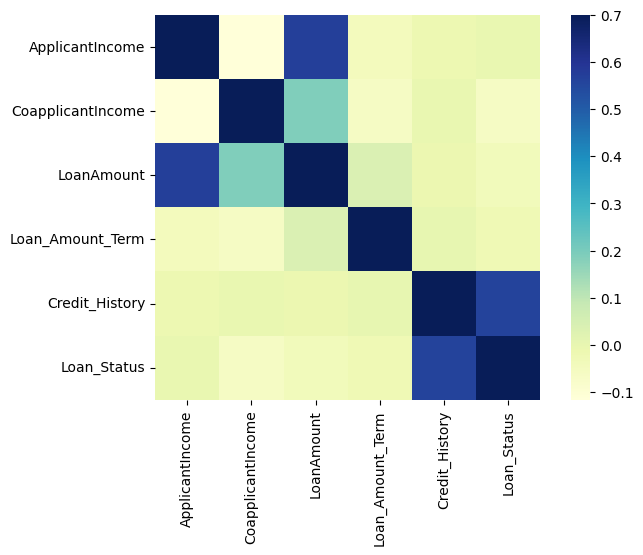

In [51]:
matrix = train.corr()
f, ax = plt.subplots(figsize = (8, 5))
sns.heatmap(matrix, vmax = .7, square = True, cmap="YlGnBu")

We can see that the following variables are highly correlated  
* ApplicantIncome & LoanAmount  
* CoapplicantIncome & LoanAmount  
* Credit_History & Loan_Status

## 6. Missing value and outlier treatment
* We have finished exploring all the variables in our data and now it is time to treat the missing values and outliers.  
* We have to address both of these because, if not treated, they can affect adversely the performance of our model.  
* There are several options and I have listed a few below.    
  -- remove the rows, remove the columns with missing data  
  -- impute the missing values, cap the outliers, log transformation to address the outliers  
* We will use missing value imputation for the missing values and log transformation to address the outliers

### Missing value imputation

In [52]:
# How many values are missing for each column / feature?
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History.  
* We will consider the following methods to impute the missing values.  
  * For categorical variables: impute using mode  
    -- Gender, Married, Dependents, Self_Employed, Credit_History  
  * For numerical variables: impute using mean or median  
    -- LoanAmount, Loan_Amount_Term

#### Impute missing values in the categorical variables using mode

In [53]:
train['Gender'].mode()

0    Male
Name: Gender, dtype: category
Categories (2, object): ['Female', 'Male']

In [54]:
train['Gender'].mode()[0]

'Male'

*Gender*

In [55]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)

*Married*

In [56]:
train['Married'].fillna(train['Married'].mode()[0], inplace = True)

*Dependents*

In [57]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)

*Self_Employed*

In [58]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)

*Credit_History*

In [59]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

#### Impute missing values in the numerical variables using mean or median
* There are several ways we can find median in a dataframe.  
* The following web page explains 4 ways we can find median of a column or the whole dataframe which I have listed below.  
https://datascienceparichay.com/article/pandas-get-median-of-one-or-more-columns/  
  -- train['Loan_Amount_Term'].median() --> median of single column  
  -- train['Loan_Amount_Term'].quantile(0.5) --> median of single column with quantile()  
  -- train.median() --> median of all numerical columns in dataframe  
  -- train.quantile(0.5) --> median of all numerical columns in dataframe with quantile()  
* I have shown below all 4 ways of finding the median for Loan_Amount_Term.

*Loan_Amount_Term*

In [60]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

* Loan_Amount_Term is a numerical variable but it is more of a categorical type as there are only a few # of loan terms.  
* Due to the above fact, replacing the missing values with median would be more appropriate than replacing with mean.  
* Due to the nature of the values (limited and fixed # of loan terms) in the Loan_Amount_Term variable, we can treat it as a categorical variable and can use mode instead of median.

In [61]:
train['Loan_Amount_Term'].median()

360.0

In [62]:
train['Loan_Amount_Term'].quantile(0.5)

360.0

In [63]:
train.median()

ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
Loan_Status             1.0
dtype: float64

In [64]:
train.quantile(0.5)

ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
Loan_Status             1.0
Name: 0.5, dtype: float64

In [65]:
train['Loan_Amount_Term'].mode()[0]

360.0

* Apart from using the median & quantile functions to find the median, we can also use describe to find the median.  
* This will give us the exact same values as of the median & quantile functions.

In [66]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.855049,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


Median (or mode) for our Loan_Amount_Term variable is 360, so we will replace the missing values with 360.

In [67]:
train['Loan_Amount_Term'].median()

360.0

In [68]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace = True)

*LoanAmount*

In [69]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

* We can see from the above describe function for LoanAmount variable that it is right skewed and there are many outliers.  
* The mean is 146, median is 128 and max is 700 which is huge.  
* Due to having many outliers and with huge values, using mean shouldn't be a correct approach because outliers give us a high value of mean. Instead, median should be our correct approach to replace the missing values.  
* We will use median of LoanAmount to replace the missing values.

In [70]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

As we have completed our missing value imputation process, we should check our dataset one more time for any missing values before we proceed further in our data analysis process.

In [71]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

* So we do not have any missing values and our train dataset is clean now.  
* We should repeat this process for the test dataset.

### In the section 8, when I tried to fit the logistic regression model, it gave me 'ValueError'     because of 'inf' values
-- I used log transformation to transform the train & test datasets in the later part of section 6.  
-- There are some 0 values for ApplicantIncome and CoapplicantIncome variable.  
-- Log of 0 (log(0)) is undefined (inf) so all the 0 values in these 2 variables are transformed to 'inf'.  
-- The logistic regression model gives 'ValueError' in the model building process.  
-- To correct this problem, I will replace 0s in ApplicantIncome and CoapplicantIncome with 1s.  
-- Replacing income of 0 with 1 won't make any difference in our analysis.

In [72]:
train[train['CoapplicantIncome'] == 0]['CoapplicantIncome']

0      0.0
2      0.0
4      0.0
15     0.0
16     0.0
      ... 
604    0.0
609    0.0
610    0.0
612    0.0
613    0.0
Name: CoapplicantIncome, Length: 273, dtype: float64

In [73]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.687296
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [74]:
# Replacing 0 with 1 in ApplicantIncome and CoapplicantIncome of train dataset
train['CoapplicantIncome'].replace(to_replace = 0, value = 1, inplace=True)
train['ApplicantIncome'].replace(to_replace = 0, value = 1, inplace=True)

In [75]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.690423,145.752443,342.410423,0.855049,0.687296
std,6109.041673,2926.001661,84.107233,64.428629,0.352339,0.463973
min,150.000000,1.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,1.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


#### Impute missing values in the categorical variables of the test dataset

In [76]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)
test['Married'].fillna(test['Married'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)

#### Impute missing values in the numerical variables of the test dataset

In [77]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(), inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True)

In [78]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [79]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [80]:
# Replacing 0 with 1 in ApplicantIncome and CoapplicantIncome of test dataset
test['CoapplicantIncome'].replace(to_replace = 0, value = 1, inplace=True)
test['ApplicantIncome'].replace(to_replace = 0, value = 1, inplace=True)

In [81]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.604905,1570.002725,135.980926,342.822888,0.839237
std,4910.680052,2333.945530,60.959739,64.658402,0.367814
min,1.000000,1.000000,28.000000,6.000000,0.000000
25%,2864.000000,1.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


We do not have any missing or 0 values and our test dataset is clean now.

### Outlier treatment
* In our earlier univariate analysis, we have seen that there are outliers in ApplicantIncome, CoapplicantIncome and LoanAmount variables.  
* Presence of outliers would affect the mean & standard deviation which would affect the distribution of data. Due to this reason, we will have to address the problem of outliers.  
* As seen below, LoanAmount as well as ApplicantIncome and CoapplicantIncome variables are right skewed.  
* One way to remove the skewness is by doing log transformation. It doesn't affect the smaller values much, but reduces the larger values much which would make our distribution similar to normal distribution.

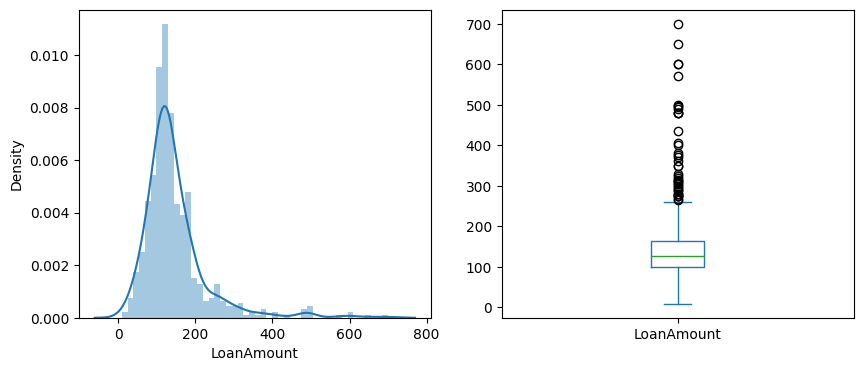

In [82]:
# Distribution of LoanAmount
plt.figure(1)

plt.subplot(121)
sns.distplot(train['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize = (10,4))

plt.show()

#### Log transformation of for the train & test datasets

*LoanAmount_log*

<AxesSubplot: >

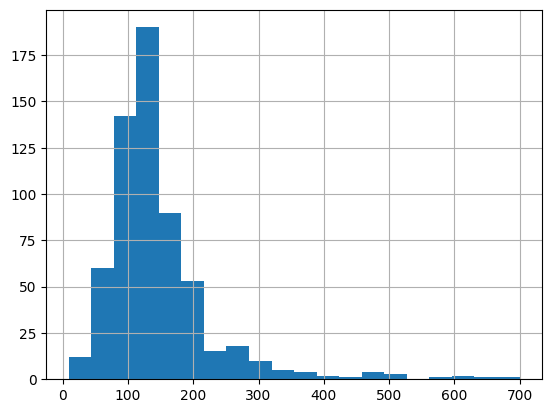

In [83]:
# LoanAmount without log transform
train['LoanAmount'].hist(bins = 20)

<AxesSubplot: >

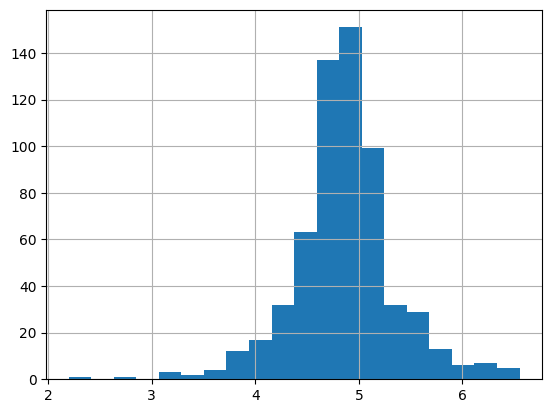

In [84]:
# LoanAmount with log transform
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins = 20)

In [85]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

*ApplicantIncome*

In [86]:
train['ApplicantIncome_log'] = np.log(train['ApplicantIncome'])

In [87]:
test['ApplicantIncome_log'] = np.log(test['ApplicantIncome'])

*CoapplicantIncome*

In [88]:
train['CoapplicantIncome_log'] = np.log(train['CoapplicantIncome'])

In [89]:
test['CoapplicantIncome_log'] = np.log(test['CoapplicantIncome'])

* We have addressed all the issues with our data and have made our data ready for model building now.
* We will build a logistic regression model and make our predictions for the test dataset in our future section.

## 7. Evaluation Metrics for classification problems
* When we build a model, we have to evaluate it's performance because we want to know how accurate the predictions from our model are.  
* We quantify the difference between the predictions and the actual values and judge beased upon the quantified numbers.  
* Lesser the difference, more accurate the predictions are and hence better the model.  
* Since this is a classification problem (loan approved -- Yes / No), we will use any of the following evaluation matrics.

**Accuracy:** We will understand Accuracy using what we call a `Confusion Matrix` which is a tabular representation of `Actual v/s Predicted` values.  

<table>
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th>Predicted</th>
      <th>Predicted</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td></td>
      <td></td>
      <td>Good</td>
      <td>Bad</td>
    </tr>
    <tr>
      <th>True</th>
      <td>Good</td>
      <td>True Positive (TP)</td>
      <td>False Negative (FN)</td>
    </tr>
    <tr>
      <th>True</th>
      <td>Bad</td>
      <td>False Positive (FP)</td>
      <td>True Negative (TN)</td>
    </tr>
  </tbody>
</table>

> *Confusion Matrix*  
  -- *True Positive (TP):* Tergets are true (Y), predictions are true (Y)  
  -- *True Negative (TN):* Tergets are false (N), predictions are false (N)  
  -- *False Positive (FP):* Tergets are false (N), predictions are true (Y)  
  -- *False Negative (FN):* Tergets are true (Y), predictions are false (N)
  <br></br>
  > *Accuracy = (TP + TN) / (TP + TN + FP + FN)* 

**Precision:** It is a measure of correctness achieved in truely positive predictions. It tells us what percentage of the predictions are truely positive.  
> *Precision = TP / TP + FP*  

**Recall (Sensitivity):** Out of all the actual positive values available to us, what percentage are predicted truely positive. It is a measure of how good our model is in predicting positive.
> *Recall = TP / TP + FN*

**Specificity:** This is a measure of how well our model is predicting negative. It is similar to *Recall* but for the negative values.
> *Specificity = TN / TN + FP*

**F1-score:** It is a measure of model's accuracy on a dataset. It is used to evaluate the binary classification problems.   
> More reading on F-score: 'https://deepai.org/machine-learning-glossary-and-terms/f-score'  
> *F1-score = 2 × (Precision × Recall) / (Precision + Recall)*

**ROC curve (Receiver Operating Characteristic Curve)):** It is a graph that shows the performance of a classification model at all classification thresholds. It summarizes the model's performance by evaluating the trade offs between true positive rate (Recall) and false positive rate (1 - specificity).  

**AUC (Area Under The Curve):** It is a performance matric for ROC curve. Higher the AUC, better the prediction power of the model.  
> More reading on ROC & AUC: 'https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5'


## 8. Model building: Part I
* We will make our first model to predict the target variable.  
* We will start with the Logistic Regression which is used to predict binary outcome.  
  -- Logistic Regression is a classification algorithm which predicts a binary outcome such as 1/0, Yes/No, True/False from independent variables in a dataset.  
  -- Logistic Regression is an estimation of Logit function.  
  -- Logit function creates a s-shaped curve with probability estimate.

In [90]:
# Loan_ID variable won't have any effect on the loan status so we will drop it from our datasets.
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

-- We will use scikit-learn (sklearn) libraryto make our models.  
-- Sklearn requires target variable in a separate dataset so we will drop it from the train dataset and save it in a new dataset.

In [91]:
X = train.drop(labels='Loan_Status', axis=1)
y = train.Loan_Status

* We will make dummy variables for the categorical variables. Dummy variable turns categorical variables into series of 0 and 1, making them a lot easier to quantify and compare.  
* Example:  
  -- 'Gender' variable has two classes, Male and Female.  
  -- Logistic Regression takes only numerical values as input so we will have to change Male and Female into numerical values.  
  -- After applying dummies, 'Gender' will be converted into Gender_Male and Gender_Female.  
  -- If 'Gender' is Male, Gender_Male = 1 and Gender_Female = 0.  
  -- If 'Gender' is Female, Gender_Male = 0 and Gender_Female = 1.

In [92]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log
0,Male,No,0,Graduate,No,5849,1.0,128.0,360.0,1.0,Urban,1,4.852030,8.674026,0.00000
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,8.430109,7.31854
2,Male,Yes,0,Graduate,Yes,3000,1.0,66.0,360.0,1.0,Urban,1,4.189655,8.006368,0.00000


In [93]:
X.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log
0,Male,No,0,Graduate,No,5849,1.0,128.0,360.0,1.0,Urban,4.852030,8.674026,0.00000
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030,8.430109,7.31854
2,Male,Yes,0,Graduate,Yes,3000,1.0,66.0,360.0,1.0,Urban,4.189655,8.006368,0.00000


In [94]:
test.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log
0,Male,Yes,0,Graduate,No,5720,1,110.0,360.0,1.0,Urban,4.700480,8.651724,0.000000
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,8.031385,7.313220
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,8.517193,7.495542


In [95]:
# Making dummy variables
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [96]:
# with dummy variables
train.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log,Gender_Female,...,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,1.0,128.0,360.0,1.0,1,4.852030,8.674026,0.00000,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,8.430109,7.31854,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,1.0,66.0,360.0,1.0,1,4.189655,8.006368,0.00000,0,...,0,0,0,1,0,0,1,0,0,1


In [97]:
# with dummy variables
X.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log,Gender_Female,Gender_Male,...,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,1.0,128.0,360.0,1.0,4.852030,8.674026,0.00000,0,1,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,8.430109,7.31854,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,1.0,66.0,360.0,1.0,4.189655,8.006368,0.00000,0,1,...,0,0,0,1,0,0,1,0,0,1


In [98]:
# with dummy variables
test.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log,Gender_Female,Gender_Male,...,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,1,110.0,360.0,1.0,4.700480,8.651724,0.000000,0,1,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,8.031385,7.313220,0,1,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,8.517193,7.495542,0,1,...,0,1,0,1,0,1,0,0,0,1


-- Will train the model on training dataset and make predictions for the test dataset.  
-- We meed to validate our predictions. For that we will divide our train dataset into 2 parts; train and validation.  
-- Usually the train part is 70 ~ 80% of data and the validation part is the remaining data.  
-- We would train the model using the train part of the data and make predictions for the validation part.  
-- Will use train_test_split function from sklearn to divide our train dataset.

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size = 0.3)

In [101]:
# We now have divided data and can build our Logistic Regression model.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [102]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [103]:
# Predict the Loan_Status for validation set
pred_validate = model.predict(X_validate)

In [104]:
pred_validate

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [105]:
# calculate how accurate the predictions are
accuracy_score(y_validate, pred_validate)

0.6810810810810811

-- Our predictions are about 77% accurate.  
-- This mean that we identified 77% of the loan status correctly.

In [106]:
# Make predictions for the test dataset
pred_test = model.predict(test)

In [107]:
# Importing the submission file that we have to submit on the solution checker.
# submission = pd.read_csv('Sample_Submission_ZAuTl80_FK3zQHh.csv')
# submission = pd.read_csv('Sample_Submission.csv')

-- We need the Loan_ID and corresponding Loan_Status for the final submission.  
-- We will fill these columns with the `Loan_ID of test` dataset and predictions that we made that is `pred_test`.

In [108]:
# Creating submission dataframe
submission = pd.DataFrame()

In [109]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [110]:
submission.head()

,Loan_Status,Loan_ID
0,1,LP001015
1,1,LP001022
2,1,LP001031
3,1,LP001035
4,1,LP001051


In [111]:
# We need predictions in Y and N, so will convert 1 and 0 to Y and N.
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [112]:
submission.head()

,Loan_Status,Loan_ID
0,Y,LP001015
1,Y,LP001022
2,Y,LP001031
3,Y,LP001035
4,Y,LP001051


In [113]:
submission.to_csv('Sample_Submission.csv', index=False)
submission.to_csv('logistic.csv', index=False)

## 9. Logistic Regression using Stratified K-Folds cross validation
* After we build our model, we don't know how good our model will be on the new data. We can check this with a technique called Validation. In this technique, we separate some % of the data (usually 20 ~ 30%) from the original dataset and train our model on the 70 ~ 80% of the data only. After training, we test our data on the separated 20 ~ 30% of the data and see how our model performs on this unseen dataset.  
* The following are some of the common method for this technique (validation):  
  -- The validation set approach  
  -- k-fold cross validation  
  -- Leave one out cross validation (LOOCV)  
  -- Stratified k-fold cross validation

* More reading on validation techniques: https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/  
* We will use Stratified k-fold cross validation for our model

In [114]:
# Import sklearn library
from sklearn.model_selection import StratifiedKFold

We now will make a cross validation logistic model with stratified 5 folds and make predictions for the test dataset.

In [124]:
i = 1
total_score = 0

kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(X, y):

    print('{} of kfold {}'.format(i, kf.n_splits), end = '')

    xtrain, xvalidate = X.iloc[train_index], X.iloc[test_index]
    ytrain, yvalidate = y.iloc[train_index], y.iloc[test_index]
    
    model = LogisticRegression(random_state = 1)
    model.fit(xtrain, ytrain)
    pred_test = model.predict(xvalidate)
        
    score = accuracy_score(yvalidate, pred_test)
    print(' accuracy_score', score)

    total_score = total_score + score
    i += 1
    
pred_test = model.predict(test)
pred = model.predict_proba(xvalidate)[:,1]
    
print('\nThe mean validation accuracy for this model is {}.'.format(total_score / (i - 1)))

1 of kfold 5 accuracy_score 0.7723577235772358
2 of kfold 5 accuracy_score 0.7642276422764228
3 of kfold 5 accuracy_score 0.6829268292682927
4 of kfold 5 accuracy_score 0.7886178861788617
5 of kfold 5 accuracy_score 0.7459016393442623

The mean validation accuracy for this model is 0.7508063441290151.


Visualize the ROC curve

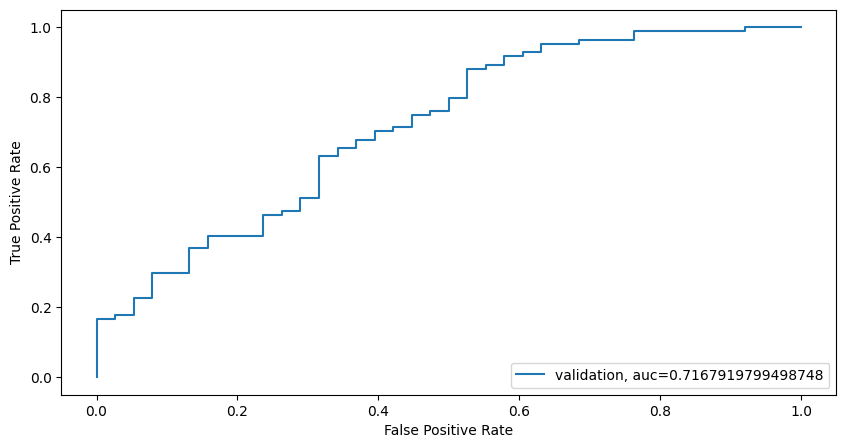

In [130]:
# from sklearn import metrics, fpr, tpr
from sklearn import metrics
from sklearn.metrics import roc_curve

_ = metrics.roc_curve(yvalidate, pred)
auc = metrics.roc_auc_score(yvalidate, pred)

fpr, tpr, thresholds = roc_curve(yvalidate, pred)

plt.figure(figsize = (10,5))
plt.plot(fpr, tpr, label = 'validation, auc=' + str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4)
plt.show()

We got an auc value of about 0.72.

## 10. Feature Engineering
* Based on the domain knowledge, we can come up with new features that might affect the target variable.   
* We will create the following 3 new features.  
  -- **Total Income:** We will combine the Applicant and Coapplicant income. We have seen that if the total income is low, chances of loan approval is low.  
  -- **EMI** (Equated Monthly Installment): It is the monthly installment to be paid by the applicant to repay the loan. The idea behind creating this variable is that people with high EMI would find it difficult to pay back the loan.  
      -- EMI = loan amount / loan amount term  
  -- **Balance Income:** It is the remaining income after the EMI has been paid. The idea behind creating this variable is that if this value is high, the chances that a person will repay the loan are high which would increase the chances of loan approval.  

In [ ]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

In [ ]:
# Checking the distribution of Total_Income
plt.figure(figsize=(10,5))
sns.distplot(train['Total_Income']).set(title = 'Total_Income')

* We can infer from the above plot that the Total_Income is right skewed and not normally distributed.  
* We will take the log transformation to remove the skewness and make the distribution normal. It doesn't affect the smaller values much, but reduces the larger values considerably which would make our distribution similar to normal distribution.  

In [ ]:
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

In [ ]:
# Checking the distribution of Total_Income after log transformation
plt.figure(figsize=(10,5))
sns.distplot(train['Total_Income_log']).set(title = 'Total_Income_log')

* The distribution looks much closer to normal now.  
* We will create the EMI feature now.

In [ ]:
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

In [ ]:
# Checking distribution of the newely created EMI variable
plt.figure(figsize=(10,5))
sns.distplot(train['EMI']).set(title = 'EMI')

We will create the Balance Income feature.

In [ ]:
train['Balance_Income'] = train['Total_Income'] - (train['EMI'] * 1000)
   # multiply with 1000 to make the units equal
test['Balance_Income'] = test['Total_Income'] - (test['EMI'] * 1000)

In [ ]:
# Checking distribution of the newely created Balance_Income variable
plt.figure(figsize=(10,5))
sns.distplot(train['Balance_Income']).set(title = 'Balance_Income')

* We can delete the variables that we used to create the new features.  
* The reason for deleting those variables is that the correlation between those variables and the new features will be very high and logistic regression assumes that the variables are highly correlated.  
* We also want to remove the noise from the dataset so removing correlated features will help in reducing the noise too.

In [ ]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis = 1)
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis = 1)

## 11. Model building: Part II  
* After creating new features, we can continue our model building process.  
* We will create the following models.  
  -- Logistic Regression  
  -- Decision Tree  
  -- Random Forest  
  -- XGBoost

Preparing the data for our models

In [ ]:
X = train.drop('Loan_Status', 1)
y = train['Loan_Status'] # y is our target variables

### Logistic Regression

In [139]:
i = 1
total_score_LR = 0

kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(X, y):
    print('{} of kfold {}'.format(i, kf.n_splits), end = '')

    xtrain, xvalidate = X.iloc[train_index], X.iloc[test_index]
    ytrain, yvalidate = y.iloc[train_index], y.iloc[test_index]
    
    model = LogisticRegression(random_state = 1)
    model.fit(xtrain, ytrain)
    pred_test = model.predict(xvalidate)
        
    score = accuracy_score(yvalidate, pred_test)
    print(' accuracy_score', score)

    total_score_LR = total_score_LR + score
    i += 1
    
pred_test = model.predict(test)
pred = model.predict_proba(xvalidate)[:,1]
    
print('\nThe mean validation accuracy for this model (Logistic Regression) is {}.'.format(total_score_LR / (i - 1)))

1 of kfold 5 accuracy_score 0.7723577235772358
2 of kfold 5 accuracy_score 0.7642276422764228
3 of kfold 5 accuracy_score 0.6829268292682927
4 of kfold 5 accuracy_score 0.7886178861788617
5 of kfold 5 accuracy_score 0.7459016393442623

The mean validation accuracy for this model (Logistic Regression) is 0.7508063441290151.


### Decision Tree

In [136]:
from sklearn import tree

In [142]:
# Fit decision tree model with 5 folds of cross validation
i = 1
total_score_DT = 0

kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(X, y):
    print('{} of kfold {}'.format(i, kf.n_splits), end = '')

    xtrain, xvalidate = X.iloc[train_index], X.iloc[test_index]
    ytrain, yvalidate = y.iloc[train_index], y.iloc[test_index]
    
    model = tree.DecisionTreeClassifier(random_state = 1)
    model.fit(xtrain, ytrain)
    pred_test = model.predict(xvalidate)
        
    score = accuracy_score(yvalidate, pred_test)
    print(' accuracy_score', score)

    total_score_DT = total_score_DT + score
    i += 1
    
pred_test = model.predict(test)

print('\nThe mean validation accuracy for Logistic Regression is {}.'.format(total_score_LR / (i - 1)))
print('The mean validation accuracy for this model (Decision Tree) is {}.'.format(total_score_DT / (i - 1)))

1 of kfold 5 accuracy_score 0.7073170731707317
2 of kfold 5 accuracy_score 0.7154471544715447
3 of kfold 5 accuracy_score 0.7235772357723578
4 of kfold 5 accuracy_score 0.7154471544715447
5 of kfold 5 accuracy_score 0.6639344262295082

The mean validation accuracy for Logistic Regression is 0.7508063441290151.
The mean validation accuracy for this model (Decision Tree) is 0.7051446088231375.


### Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
i = 1
total_score_RF = 0

kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(X, y):
    print('{} of kfold {}'.format(i, kf.n_splits), end = '')

    xtrain, xvalidate = X.iloc[train_index], X.iloc[test_index]
    ytrain, yvalidate = y.iloc[train_index], y.iloc[test_index]
    
    model = RandomForestClassifier(random_state = 1, max_depth = 10)
    model.fit(xtrain, ytrain)
    pred_test = model.predict(xvalidate)
        
    score = accuracy_score(yvalidate, pred_test)
    print(' accuracy_score', score)

    total_score_RF = total_score_RF + score
    i += 1
    
pred_test = model.predict(test)

print('\nThe mean validation accuracy for Logistic Regression is {}.'.format(total_score_LR / (i - 1)))
print('The mean validation accuracy for Decision Tree is {}.'.format(total_score_DT / (i - 1)))
print('The mean validation accuracy for this model (Random Forest) is {}.'.format(total_score_RF / (i - 1)))

1 of kfold 5 accuracy_score 0.8130081300813008
2 of kfold 5 accuracy_score 0.8536585365853658
3 of kfold 5 accuracy_score 0.7886178861788617
4 of kfold 5 accuracy_score 0.8048780487804879
5 of kfold 5 accuracy_score 0.7950819672131147

The mean validation accuracy for Logistic Regression is 0.7508063441290151.
The mean validation accuracy for Decision Tree is 0.7051446088231375.
The mean validation accuracy for this model (Random Forest) is 0.8110489137678261.


### XGBoost

We will use the following 2 parameters in this model:  
-- n_estimators: this decides the # of tree that will be used in this model  
-- max_depth: this decides the maximum depth of the tree  

In [149]:
#!pip install xgboost
from xgboost import XGBClassifier

In [150]:
i = 1
total_score_XG = 0

kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(X, y):
    print('{} of kfold {}'.format(i, kf.n_splits), end = '')

    xtrain, xvalidate = X.iloc[train_index], X.iloc[test_index]
    ytrain, yvalidate = y.iloc[train_index], y.iloc[test_index]
    
    model = XGBClassifier(n_estimators = 50, max_depth = 4)
    model.fit(xtrain, ytrain)
    pred_test = model.predict(xvalidate)
        
    score = accuracy_score(yvalidate, pred_test)
    print(' accuracy_score', score)

    total_score_XG = total_score_XG + score
    i += 1
    
pred_test = model.predict(test)

print('\nThe mean validation accuracy for Logistic Regression is {}.'.format(total_score_LR / (i - 1)))
print('The mean validation accuracy for Decision Tree is {}.'.format(total_score_DT / (i - 1)))
print('The mean validation accuracy for Random Forest is {}.'.format(total_score_RF / (i - 1)))
print('The mean validation accuracy for this model (XGBoost) is {}.'.format(total_score_XG / (i - 1)))

1 of kfold 5 accuracy_score 0.8130081300813008
2 of kfold 5 accuracy_score 0.7967479674796748
3 of kfold 5 accuracy_score 0.7886178861788617
4 of kfold 5 accuracy_score 0.7723577235772358
5 of kfold 5 accuracy_score 0.7704918032786885

The mean validation accuracy for Logistic Regression is 0.7508063441290151.
The mean validation accuracy for Decision Tree is 0.7051446088231375.
The mean validation accuracy for Random Forest is 0.8110489137678261.
The mean validation accuracy for this model (XGBoost) is 0.7882447021191524.


We tried 4 different algorithms and achieved the best accuracy of 0.81 by Random Forest algorithm.

# --- END ---